# Demo: Importancia de los features en un Árbol de decisión

Vamos a comenzar con la lectura del dataset de aceptabilidad de autos.

In [0]:
import pandas as pd
df = pd.read_csv('car.csv') # Revisar el path
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Esta vez codificaremos los features usando un esquema de codificación One Hot, es decir, los consideraremos como variables categóricas.

Debido a que Scikit-Learn no entiende los strings, sólo números, también necesitaremos asignarle números a las etiquetas. Para eso usaremos el `LabelEncoder`.

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))
X.iloc[:,0:8].head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh
0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1


Vamos a entrenar un árbol de decisión en todo el conjunto de datos (ignoraremos el overfitting por el momento). También vamos a limitar artificialmente el árbol a ser pequeño para que podamos visualizarlo.

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2, random_state = 11)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=11, splitter='best')

Ahora visualicemos el árbol usando el exportador de graphviz. Completar lo que falta

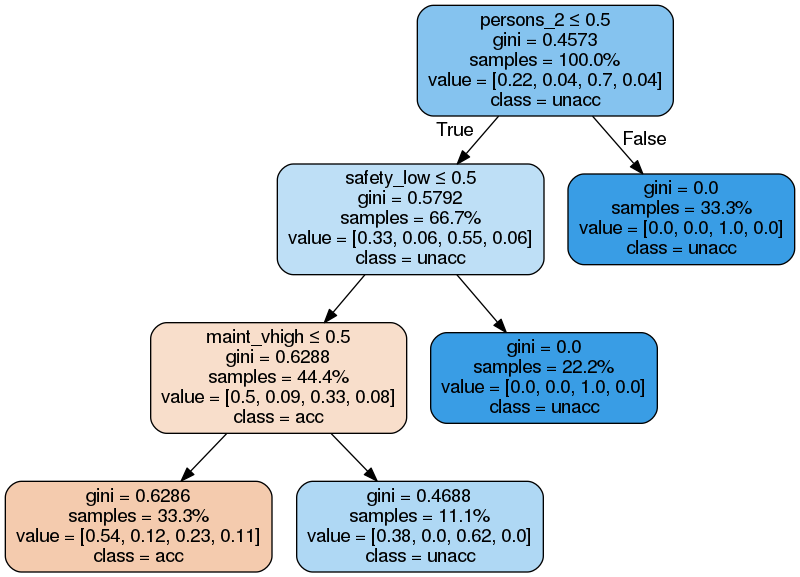

In [0]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dt, out_file=None,  
                    feature_names=X.columns,  
                    class_names=le.classes_,  
                    filled=True, rounded=True,
                    proportion=True,
                    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Aquí vamos a trazar el índice Gini para varias proporciones en una clasificación binaria:

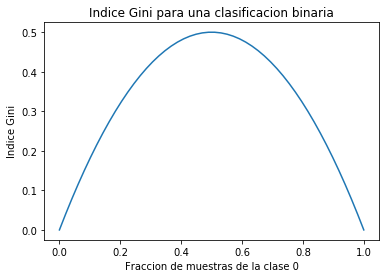

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C0 = np.linspace(0,1)
C1 = 1.0 - C0

gini = 1 - ( C0**2 + C1**2 )

plt.plot(C0, gini)
plt.title('Indice Gini para una clasificacion binaria')
plt.xlabel('Fraccion de muestras de la clase 0')
plt.ylabel('Indice Gini')

Aquí vamos a verificar el cálculo del índice Gini en el nodo raíz del árbol de arriba:

In [0]:
cantidad_ocurrencias_clases = pd.Series(y).value_counts()
total_observaciones = sum( cantidad_ocurrencias_clases )

proporciones_clases = cantidad_ocurrencias_clases / total_observaciones

print ("Proporciones Clases")
print (proporciones_clases)

gini = 1 - sum( proporciones_clases ** 2 )
print ("Gini: ",gini)


Proporciones Clases
2    0.700231
0    0.222222
1    0.039931
3    0.037616
dtype: float64
Gini:  0.457283763074


Ahora veamos la importancia de los features del árbol generado.
Para lo cual utilizaremos feature\_importances\_

In [0]:
importancia_features = pd.DataFrame(dt.feature_importances_,
    index = X.columns,
    columns=['importancia']).sort_values('importancia',
        ascending=False)
importancia_features.head()

,importancia
safety_low,0.545239
persons_2,0.363493
maint_vhigh,0.091268
buying_high,0.000000
doors_5more,0.000000


Ahora verifiquemos el cálculo de la importancia.

In [0]:
ganancia_gini_persons_2    = 1.000 * 0.4573 - 0.667 * 0.5792 - 0.333 * 0.0000
ganancia_gini_safety_low   = 0.666 * 0.5792 - 0.444 * 0.6288 - 0.222 * 0.0000
ganancia_gini_buying_vhigh = 0.444 * 0.6288 - 0.333 * 0.6286 - 0.111 * 0.4688

norm = ganancia_gini_persons_2 + ganancia_gini_safety_low + ganancia_gini_buying_vhigh

print ("persons_2:", ganancia_gini_persons_2 / norm)
print ("safety_low:", ganancia_gini_safety_low / norm)
print ("buying_vhigh:", ganancia_gini_buying_vhigh / norm)

persons_2: 0.3632961063717171
safety_low: 0.5454539870454681
buying_vhigh: 0.09124990658281469
